In [1]:
import os
os.chdir('E:/final_dataset/')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.logging.print_header()

scanpy==1.9.1 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
neuall = sc.read_h5ad('10x_cn_neuron_mtx/cn_neurons.h5ad')
pseq = sc.read_h5ad('patchseq_mtx/patchseq.dataset.final.h5ad')

In [3]:
pEN =  pseq[pseq.obs['Expert_label'].isin(['Bushy','Octopus','T-stellate','Fusiform'])].copy()
pIN =  pseq[pseq.obs['Expert_label'].isin(['Vertical','SSC','Cartwheel','L-stellate','D-stellate'])].copy()

In [4]:
sns.set_style("white")

In [5]:
sc.pp.highly_variable_genes(pEN)
sc.tl.pca(pEN, svd_solver='arpack')
sc.tl.umap(pEN)

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


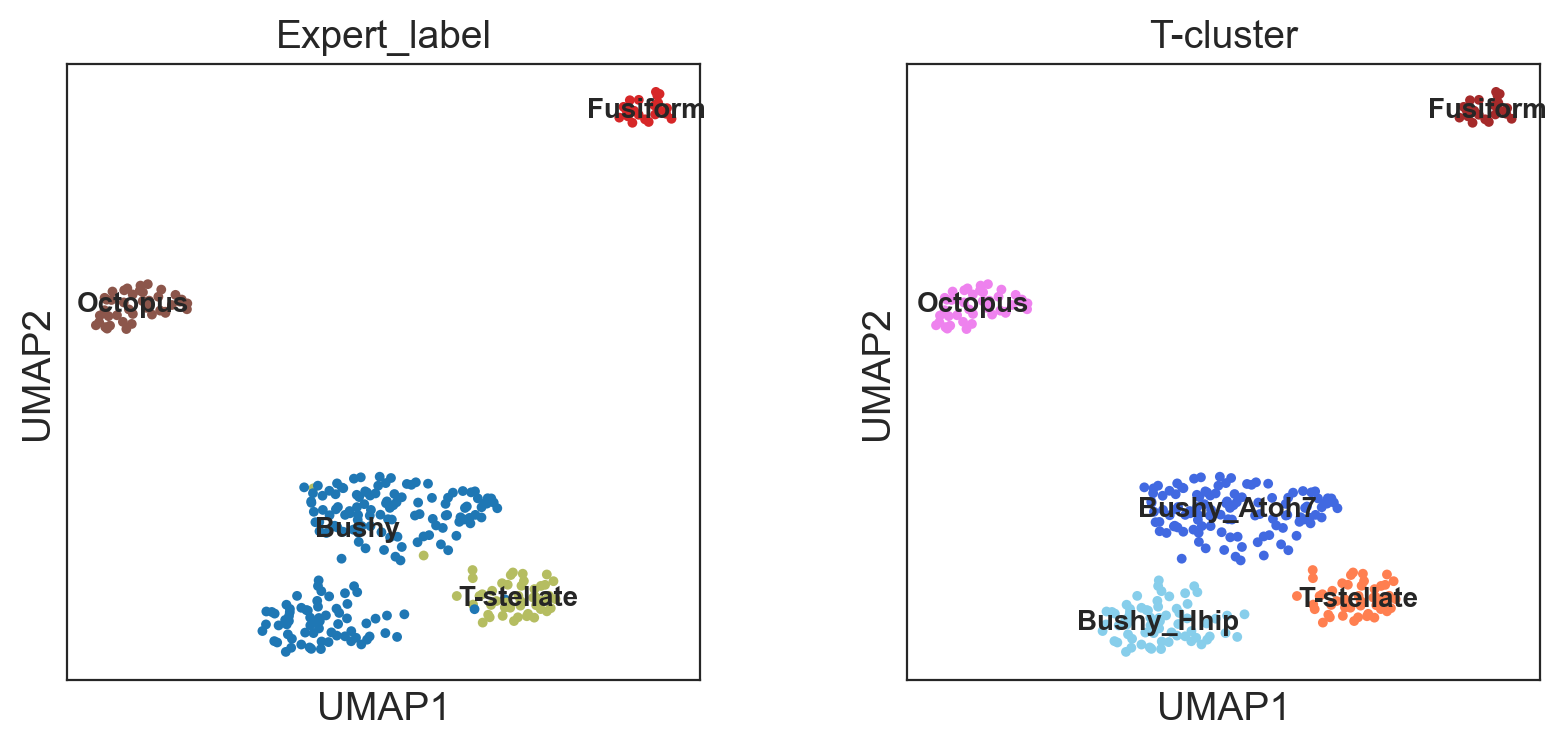

In [6]:
sc.pl.umap(pEN, color=['Expert_label','T-cluster'], s = 50,
           legend_loc='on data',legend_fontsize= 10,cmap = 'YlOrRd', ncols=2, frameon= True,
)

[[ 67 111   0   0   2]
 [  0   0  22   0   0]
 [  0   0   0  43   0]
 [  0   2   0   0  46]]


Text(38.72222222222222, 0.5, 'Expert Label')

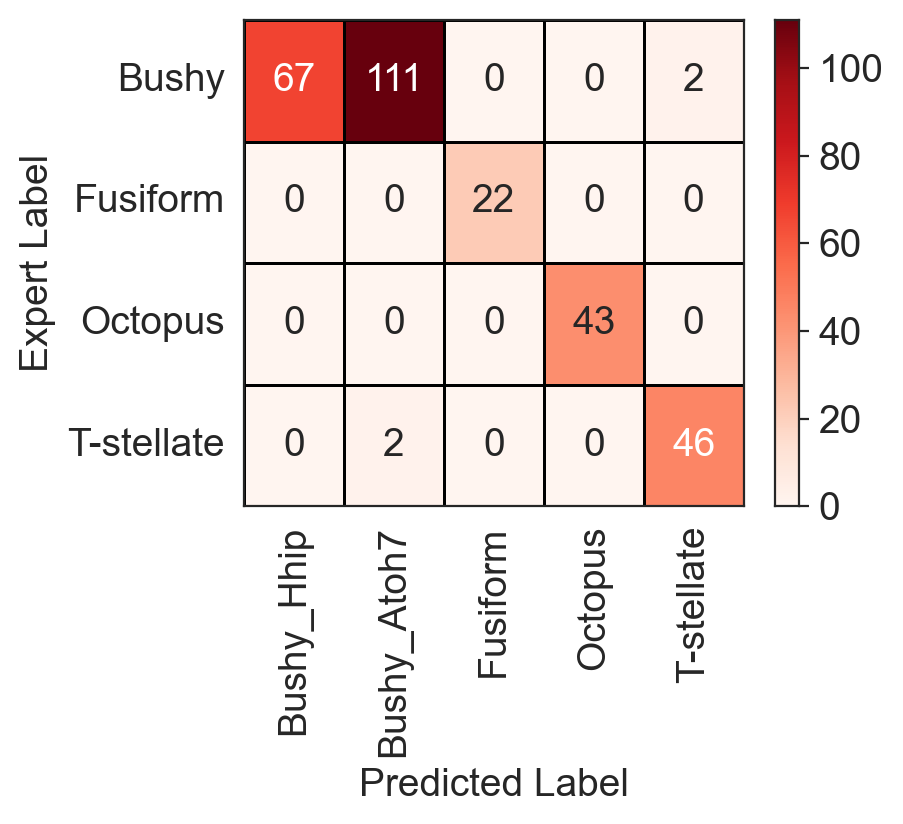

In [7]:
plt.figure(figsize=(4,3.2))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_true = pEN.obs['Expert_label']
y_pred = pEN.obs['T-cluster']

cm = confusion_matrix(x_true, y_pred)
cm = np.delete(cm,[0],1)
cm = np.take(cm, [0, 3, 4, 5], axis=0)
cm = np.take(cm, [1,0,2,3, 4], axis=1)
print(cm)
rcParams['figure.figsize'] = 4, 3.5
ax = sns.heatmap(cm, cmap='Reds',cbar=True,linewidths=1, linecolor='black',annot=True,fmt="d")
sns.despine(top = False, right = False, left = False,bottom = False)  
ax.set_xticklabels(['Bushy_Hhip','Bushy_Atoh7','Fusiform','Octopus', 'T-stellate'])
ax.set_yticklabels(['Bushy','Fusiform','Octopus', 'T-stellate'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=16)
plt.rc('font', size=16) 
plt.rc('figure', titlesize=16)
plt.rc('legend', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('Expert Label')

[[1.         0.98230088 0.         0.         0.04166667]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.01769912 0.         0.         0.95833333]]


Text(38.72222222222222, 0.5, 'Expert Label')

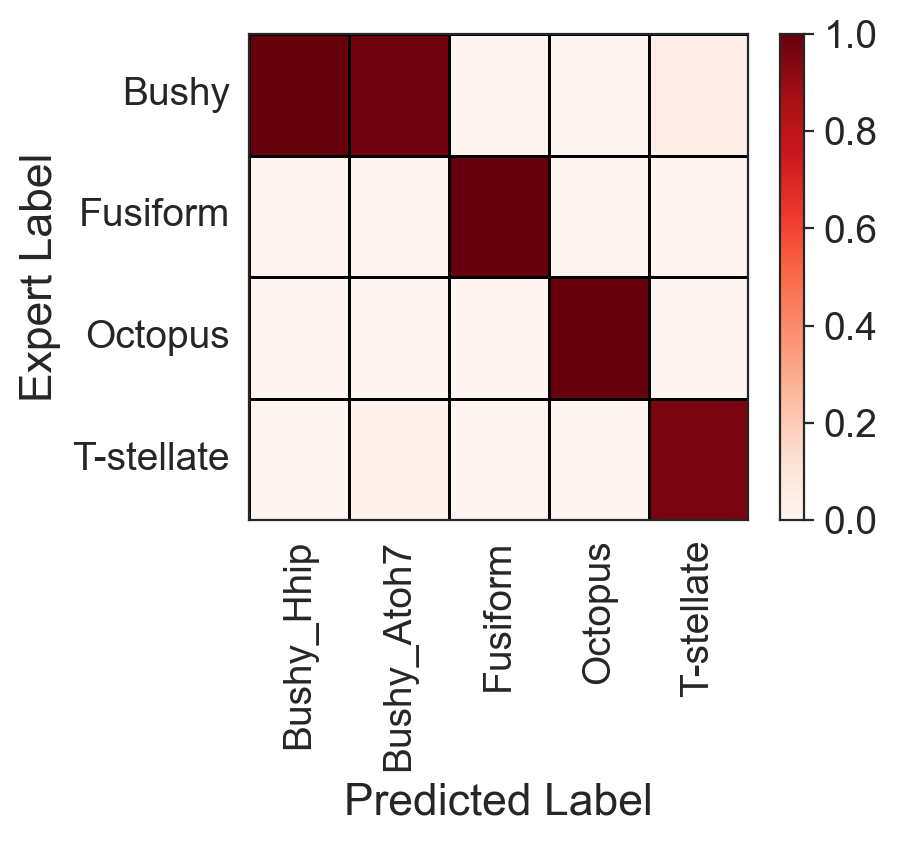

In [8]:
plt.figure(figsize=(4,3.2))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_true = pEN.obs['Expert_label']
y_pred = pEN.obs['T-cluster']

cm = confusion_matrix(x_true, y_pred,normalize = 'pred')
cm = np.delete(cm,[0],1)
cm = np.take(cm, [0, 3, 4, 5], axis=0)
cm = np.take(cm, [1,0,2,3, 4], axis=1)
print(cm)
rcParams['figure.figsize'] = 4, 3.5
ax = sns.heatmap(cm, cmap='Reds',cbar=True,linewidths=1, linecolor='black')
sns.despine(top = False, right = False, left = False,bottom = False)  
ax.set_xticklabels(['Bushy_Hhip','Bushy_Atoh7','Fusiform','Octopus', 'T-stellate'])
ax.set_yticklabels(['Bushy','Fusiform','Octopus', 'T-stellate'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=16)
plt.rc('font', size=16) 
plt.rc('figure', titlesize=16)
plt.rc('legend', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('Expert Label')

In [9]:
sc.pp.highly_variable_genes(pIN)
sc.tl.pca(pIN, svd_solver='arpack')
sc.tl.umap(pIN)

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


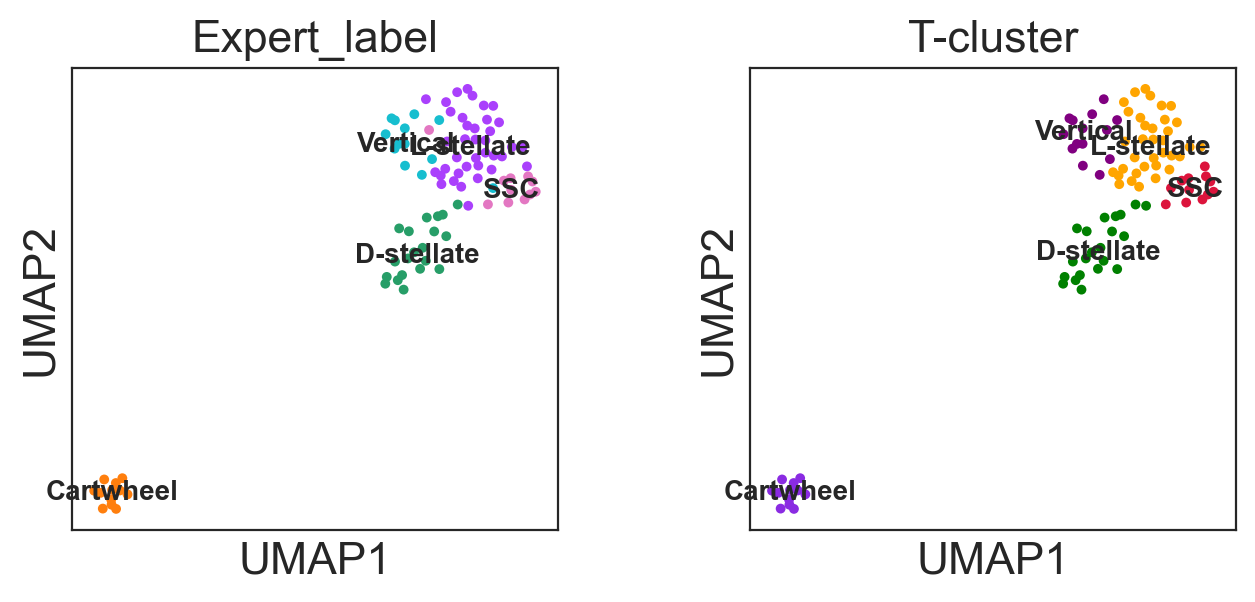

In [10]:
rcParams['figure.figsize'] = 3, 3
sc.pl.umap(pIN, color=['Expert_label','T-cluster'], s = 50,
           legend_loc='on data',legend_fontsize= 10,cmap = 'YlOrRd', ncols=2, frameon= True,
                )

[[12  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  1 35  1  1]
 [ 0  0  0 10  1]
 [ 0  0  0  1 12]]


Text(38.72222222222222, 0.5, 'Expert Label')

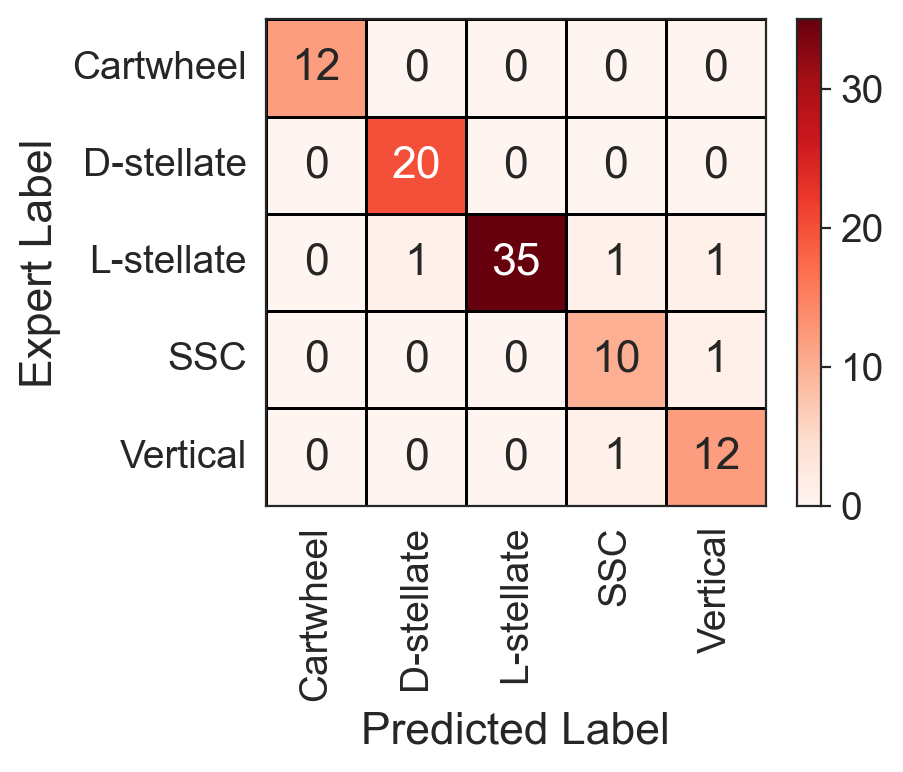

In [11]:
plt.figure(figsize=(4,3.2))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_true = pIN.obs['Expert_label']
y_pred = pIN.obs['T-cluster']

cm = confusion_matrix(x_true, y_pred)
print(cm)
rcParams['figure.figsize'] = 4, 3.5
ax = sns.heatmap(cm, cmap='Reds',cbar=True,linewidths=1, linecolor='black',annot=True,fmt="d")
sns.despine(top = False, right = False, left = False,bottom = False)  
labels = ['Vertical','SSC','Cartwheel','L-stellate','D-stellate']
labels = sorted(labels)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=16)
plt.rc('font', size=16) 
plt.rc('figure', titlesize=16)
plt.rc('legend', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('Expert Label')

[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.02631579 0.92105263 0.02631579 0.02631579]
 [0.         0.         0.         0.90909091 0.09090909]
 [0.         0.         0.         0.07692308 0.92307692]]


Text(38.72222222222222, 0.5, 'Expert Label')

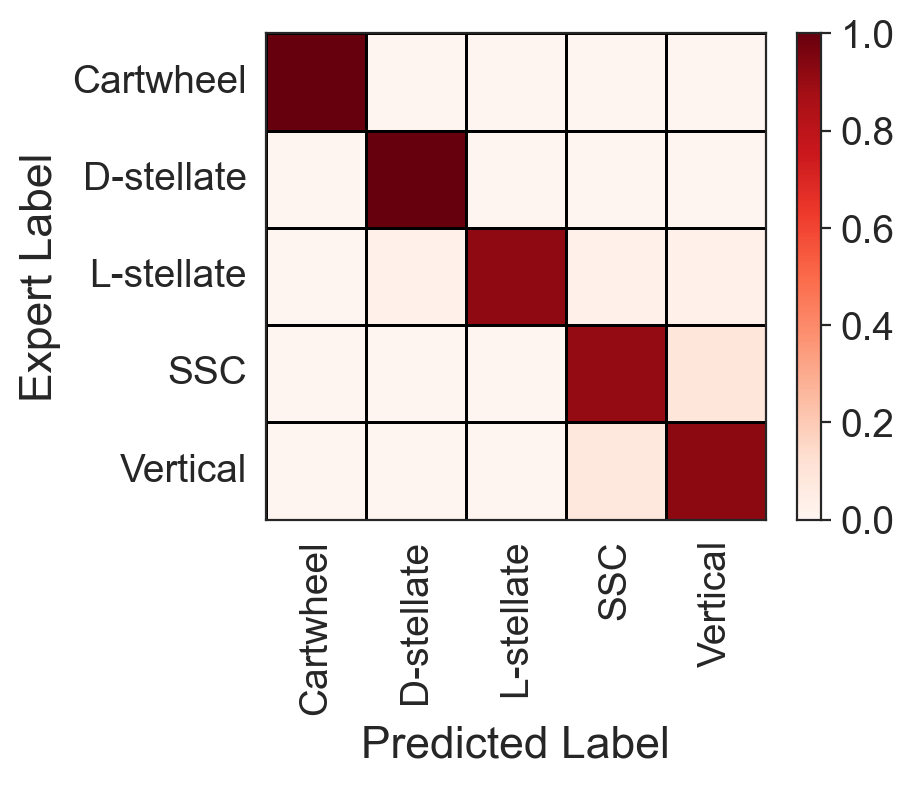

In [12]:
plt.figure(figsize=(4,3.2))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
x_true = pIN.obs['Expert_label']
y_pred = pIN.obs['T-cluster']

cm = confusion_matrix(x_true, y_pred,normalize = 'true')
print(cm)
rcParams['figure.figsize'] = 4, 3.5
ax = sns.heatmap(cm, cmap='Reds',cbar=True,linewidths=1, linecolor='black')
sns.despine(top = False, right = False, left = False,bottom = False)  
labels = ['Vertical','SSC','Cartwheel','L-stellate','D-stellate']
labels = sorted(labels)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=16)
plt.rc('font', size=16) 
plt.rc('figure', titlesize=16)
plt.rc('legend', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('Expert Label')

In [13]:
pEN

AnnData object with n_obs × n_vars = 293 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)

In [14]:
pIN

AnnData object with n_obs × n_vars = 94 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)'

In [15]:
index = neuall.obs_names
umap1 = pd.DataFrame(neuall.obsm['X_umap'],index = index)
leiden = neuall.obs['clusters'].astype('string')
neuUMAP = pd.DataFrame(leiden)
neuUMAP['umapX'] = umap1[0]
neuUMAP['umapY'] = umap1[1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


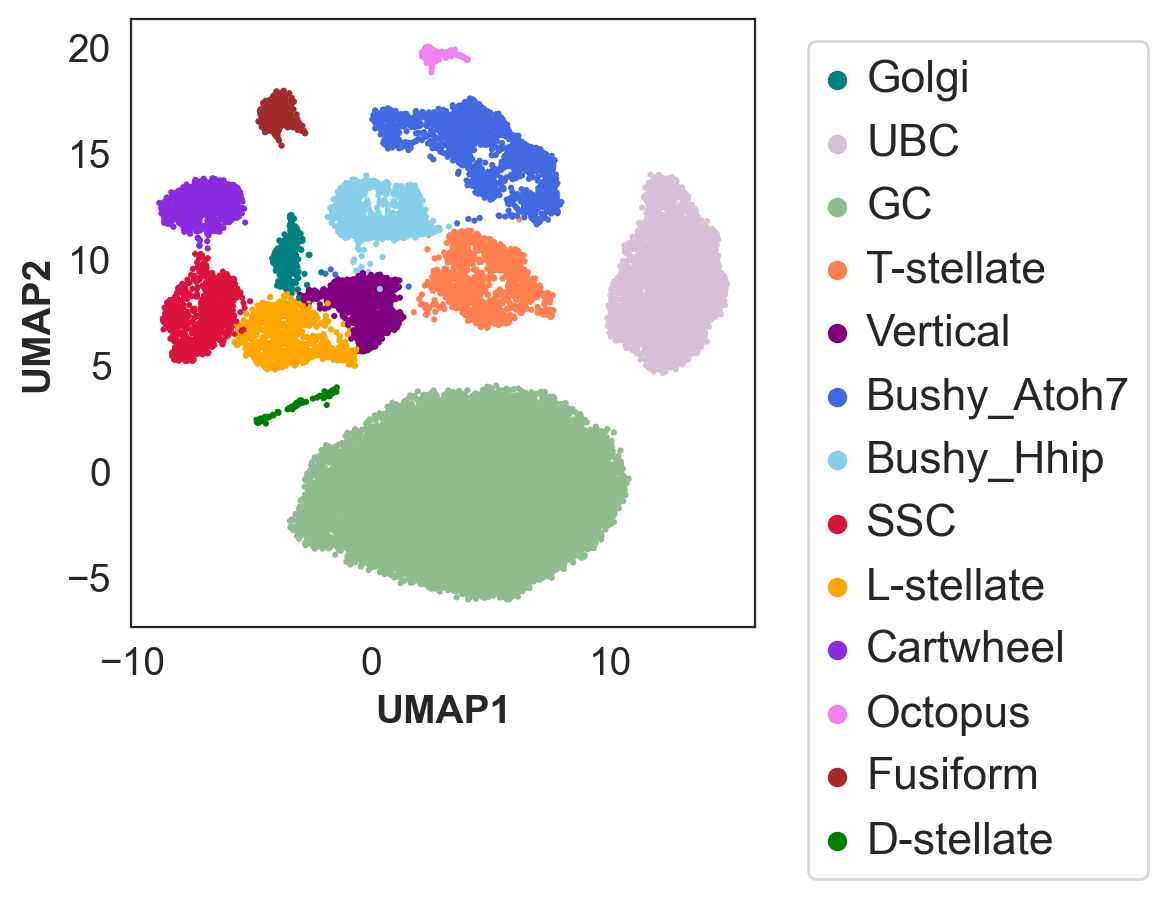

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))

palette={'Golgi':'teal','UBC':'thistle',
         'GC':'darkseagreen','T-stellate':'coral',
         'Vertical':'purple','Bushy_Atoh7':'royalblue',
         'Bushy_Hhip':'skyblue','SSC':'crimson',
         'L-stellate':'orange', 'Cartwheel':'blueviolet',
          'Octopus':'violet','Fusiform':'brown',
         'D-stellate':'green'}

sns.scatterplot(neuUMAP['umapX'],neuUMAP['umapY'],s = 5,
                    hue = neuUMAP['clusters'],
                    palette = palette,
                    edgecolor="none",
                    alpha = 1)

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)

#plt.savefig('10X.pdf',dpi = 600)
#plt.savefig('10X.png',dpi = 600)
#sns.despine()

In [17]:
df1 = sc.get.obs_df(pEN, ['T-cluster','10x_mapping_umapX', '10x_mapping_umapY','10x_clusters_subclusters','Expert_label'])
df2 = sc.get.obs_df(pIN, ['T-cluster','10x_mapping_umapX', '10x_mapping_umapY','10x_clusters_subclusters','Expert_label'])
df = df1.append(df2)   

C:\Users\Junzhan\AppData\Local\Temp\ipykernel_2248\259406900.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


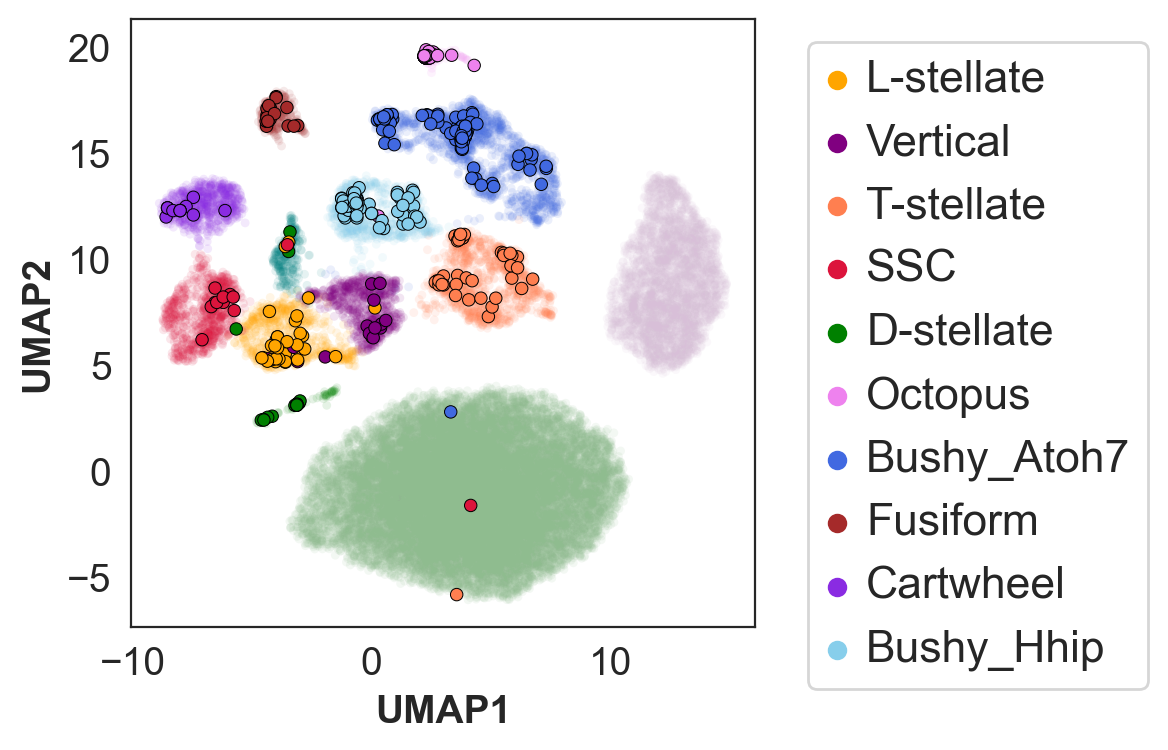

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))

sns.scatterplot(neuUMAP['umapX'],neuUMAP['umapY'],s = 10,
                    hue = neuUMAP['clusters'],legend =False,
                    palette = palette, 
                    edgecolor="none",
                    alpha = 0.1)

df = df.sort_values(by='10x_clusters_subclusters', ascending=False)

x = df['10x_mapping_umapX']
y = df['10x_mapping_umapY']

sns.scatterplot(df['10x_mapping_umapX'],df['10x_mapping_umapY'],s = 20,
                hue = df['T-cluster'],
                palette = palette,
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)

In [19]:
df['10xclusters'] = df['10x_clusters_subclusters']
df.loc[(df['10x_clusters_subclusters'] == 'Bushy-Atoh7'),'10xclusters'] = 'Bushy_Atoh7'
df.loc[(df['10x_clusters_subclusters'] == 'Bushy-Hhip'),'10xclusters'] = 'Bushy_Hhip'
df.loc[(df['10x_clusters_subclusters'] == 'T-Dchs2'),'10xclusters'] = 'T-stellate'
df.loc[(df['10x_clusters_subclusters'] == 'T-Fn1'),'10xclusters'] = 'T-stellate'
#df.loc[(df['Expert_label'] == 'Bushy') & (df['T-cluster'] != 'T-stellate'), 'Expert_label'] = df['T-cluster']

Text(38.456597222222214, 0.5, '10x Clusters')

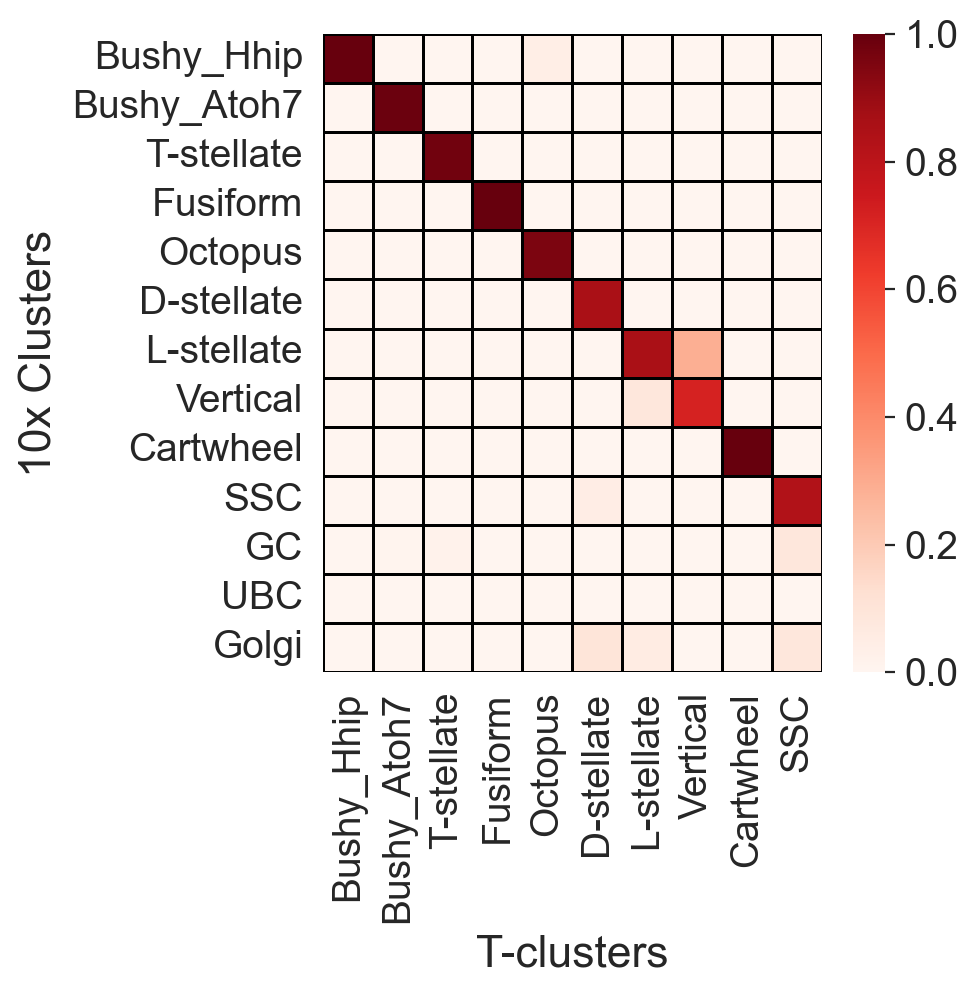

In [20]:
tenxCts  = ['Bushy_Hhip','Bushy_Atoh7','T-stellate','Fusiform','Octopus','D-stellate','L-stellate', 'Vertical',
            'Cartwheel','SSC','GC','UBC','Golgi']
anCts = ['Bushy_Hhip','Bushy_Atoh7','T-stellate','Fusiform','Octopus','D-stellate','L-stellate', 'Vertical',
            'Cartwheel','SSC']
matchPairs = df.groupby(['T-cluster','10xclusters']).count()
matchPairs['counts'] = matchPairs['10x_clusters_subclusters']
del matchPairs['10x_mapping_umapX']
del matchPairs['10x_mapping_umapY']
del matchPairs['10x_clusters_subclusters']
del matchPairs['Expert_label']
mapping = pd.DataFrame(index = anCts, columns = tenxCts)
mapping= mapping.fillna(0.0)
for names in anCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]/count
rcParams['figure.figsize'] = 4, 4.2
ax = sns.heatmap(mapping.T, cmap='Reds',cbar=True,
                 linewidths=1, linecolor='black',annot = False,# annot_kws = {'size':14},fmt='0.3f'
                )
plt.xlabel('T-clusters')
plt.ylabel('10x Clusters')

In [21]:
matchPairs

counts
T-cluster   10xclusters        
Bushy_Atoh7 Bushy_Atoh7     112
            GC                1
Bushy_Hhip  Bushy_Hhip       67
Cartwheel   Cartwheel        12
D-stellate  D-stellate       18
            Golgi             2
            SSC               1
Fusiform    Fusiform         22
L-stellate  Golgi             2
            L-stellate       30
            Vertical          3
Octopus     Bushy_Hhip        2
            Octopus          41
SSC         GC                1
            Golgi             1
            SSC              10
T-stellate  GC                1
            T-stellate       47
Vertical    L-stellate        4
            Vertical         10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


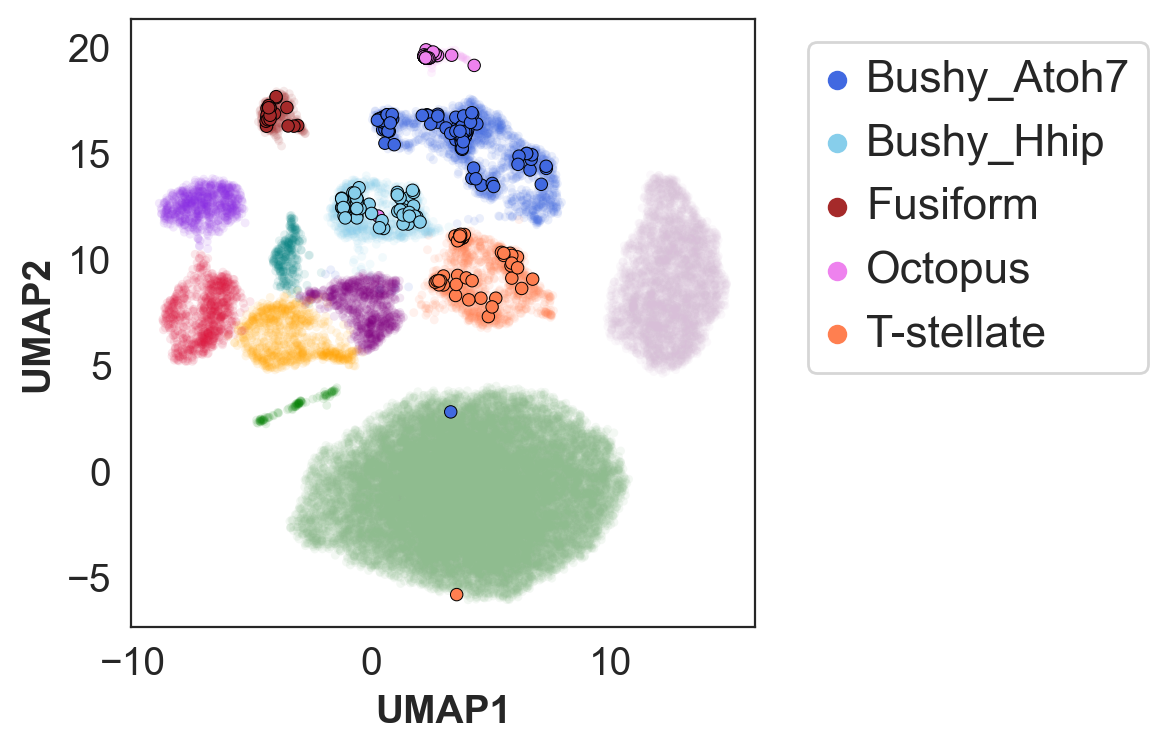

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
df = df1
sns.scatterplot(neuUMAP['umapX'],neuUMAP['umapY'],s = 10,
                    hue = neuUMAP['clusters'],legend =False,
                    palette = palette, 
                    edgecolor="none",
                    alpha = 0.1)

df = df.sort_values(by='10x_clusters_subclusters', ascending=False)

x = df['10x_mapping_umapX']
y = df['10x_mapping_umapY']

sns.scatterplot(df['10x_mapping_umapX'],df['10x_mapping_umapY'],s = 20,
                hue = df['T-cluster'],
                palette = palette,
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)

In [23]:
matchPairs

counts
T-cluster   10xclusters        
Bushy_Atoh7 Bushy_Atoh7     112
            GC                1
Bushy_Hhip  Bushy_Hhip       67
Cartwheel   Cartwheel        12
D-stellate  D-stellate       18
            Golgi             2
            SSC               1
Fusiform    Fusiform         22
L-stellate  Golgi             2
            L-stellate       30
            Vertical          3
Octopus     Bushy_Hhip        2
            Octopus          41
SSC         GC                1
            Golgi             1
            SSC              10
T-stellate  GC                1
            T-stellate       47
Vertical    L-stellate        4
            Vertical         10

Text(2.456597222222216, 0.5, '10x Clusters')

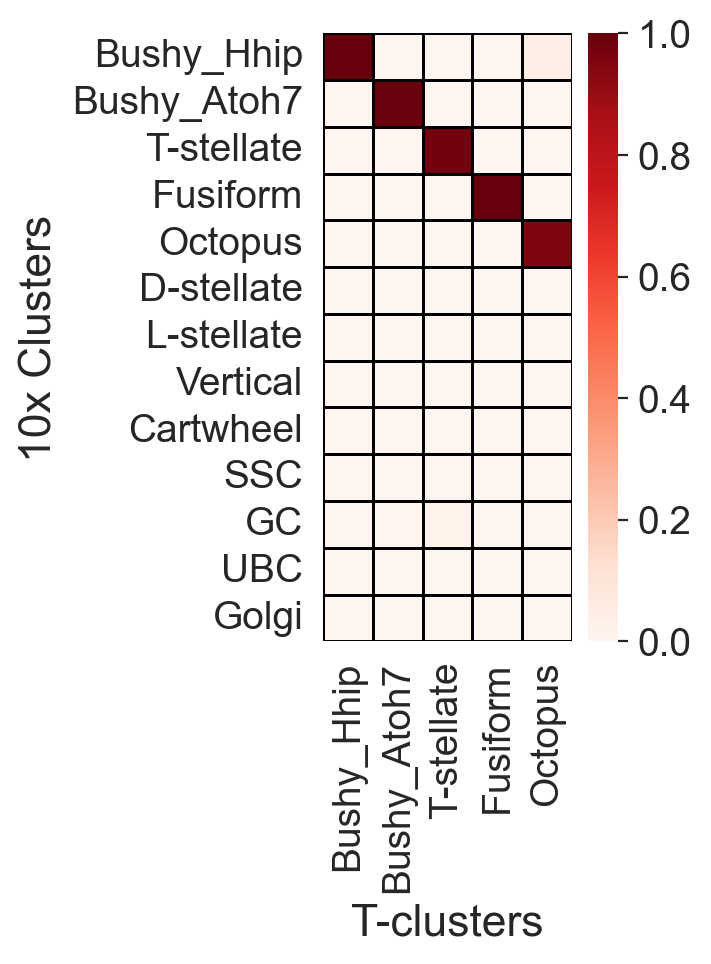

In [24]:
tenxCts  = ['Bushy_Hhip','Bushy_Atoh7','T-stellate','Fusiform','Octopus','D-stellate','L-stellate', 'Vertical',
            'Cartwheel','SSC','GC','UBC','Golgi']
anCts = ['Bushy_Hhip','Bushy_Atoh7','T-stellate','Fusiform','Octopus']

mapping = pd.DataFrame(index = anCts, columns = tenxCts)
mapping= mapping.fillna(0.0)
for names in anCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]/count
rcParams['figure.figsize'] = 2, 4
ax = sns.heatmap(mapping.T, cmap='Reds',cbar=True,
                 linewidths=1, linecolor='black',annot = False,# annot_kws = {'size':14},fmt='0.3f'
                )
plt.xlabel('T-clusters')
plt.ylabel('10x Clusters')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


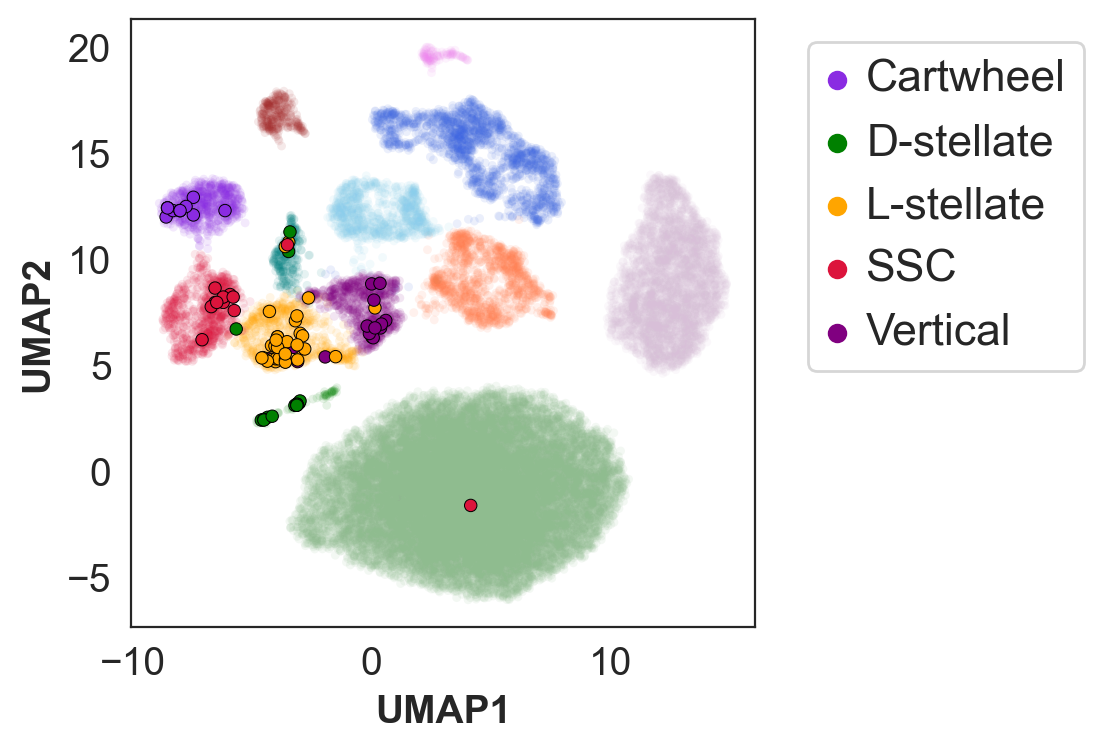

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
df = df2
sns.scatterplot(neuUMAP['umapX'],neuUMAP['umapY'],s = 10,
                    hue = neuUMAP['clusters'],legend =False,
                    palette = palette, 
                    edgecolor="none",
                    alpha = 0.1)

df = df.sort_values(by='10x_clusters_subclusters', ascending=False)

x = df['10x_mapping_umapX']
y = df['10x_mapping_umapY']

sns.scatterplot(df['10x_mapping_umapX'],df['10x_mapping_umapY'],s = 20,
                hue = df['T-cluster'],
                palette = palette,
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)

Text(56.72222222222221, 0.5, 'T-clusters')

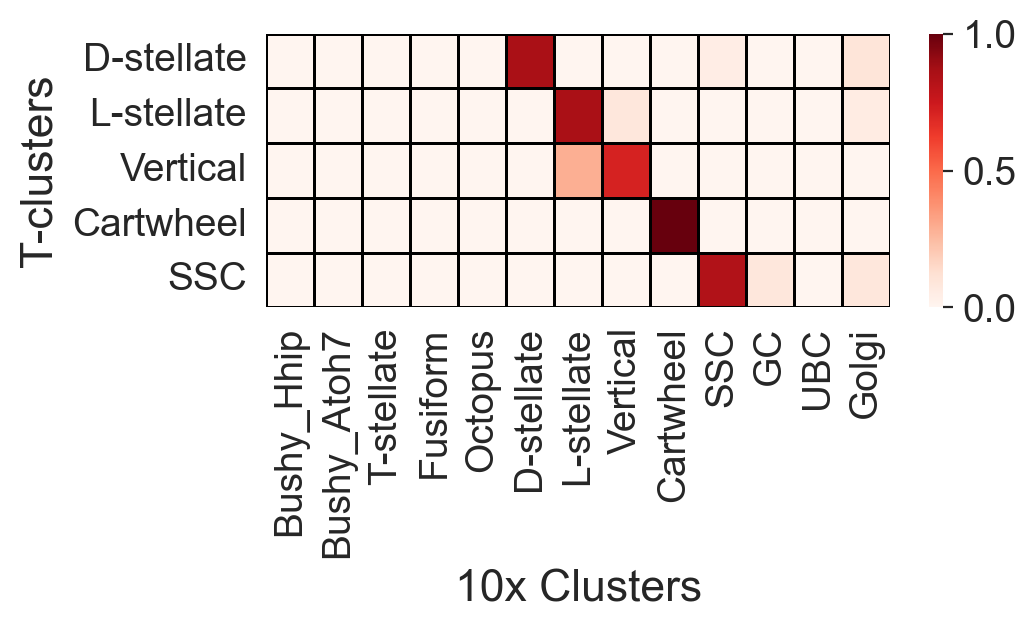

In [26]:
tenxCts  = ['Bushy_Hhip','Bushy_Atoh7','T-stellate','Fusiform','Octopus','D-stellate','L-stellate', 'Vertical',
            'Cartwheel','SSC','GC','UBC','Golgi']
anCts = ['D-stellate','L-stellate', 'Vertical',
            'Cartwheel','SSC']

mapping = pd.DataFrame(index = anCts, columns = tenxCts)
mapping= mapping.fillna(0.0)
for names in anCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]/count
rcParams['figure.figsize'] = 5, 1.8
ax = sns.heatmap(mapping, cmap='Reds',cbar=True,
                 linewidths=1, linecolor='black',annot = False,# annot_kws = {'size':14},fmt='0.3f'
                )
plt.xlabel('10x Clusters')
plt.ylabel('T-clusters')

In [29]:
neuall

AnnData object with n_obs × n_vars = 31639 × 18727
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'gender', 'seqbatch', 'sample', 'preparations', 'clusters', 'subclusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'clusters_colors', 'hvg', 'neighbors', 'subclusters_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

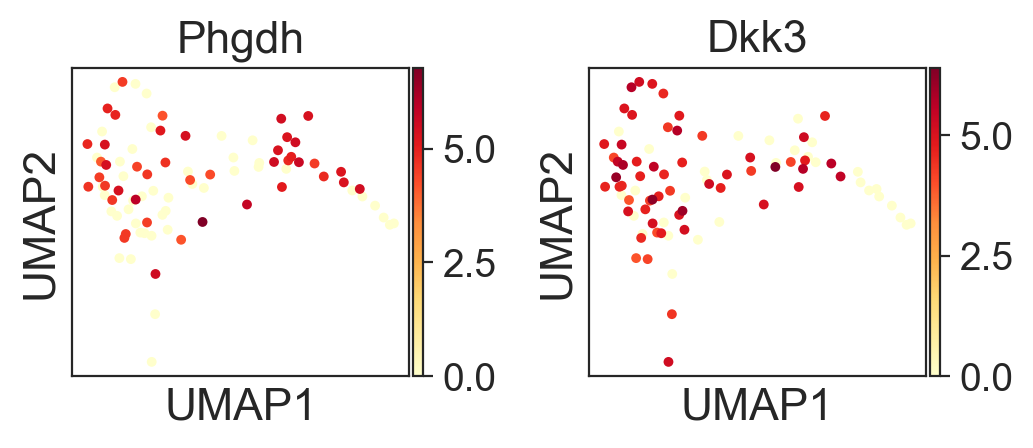

In [32]:
rcParams['figure.figsize'] = 2, 2
sc.pl.umap(neuall[neuall.obs['clusters'].isin(['Octopus'])], color=['Phgdh','Dkk3'], s = 50,
           legend_loc='on data',legend_fontsize= 10,cmap = 'YlOrRd', ncols=2, frameon= True,
)

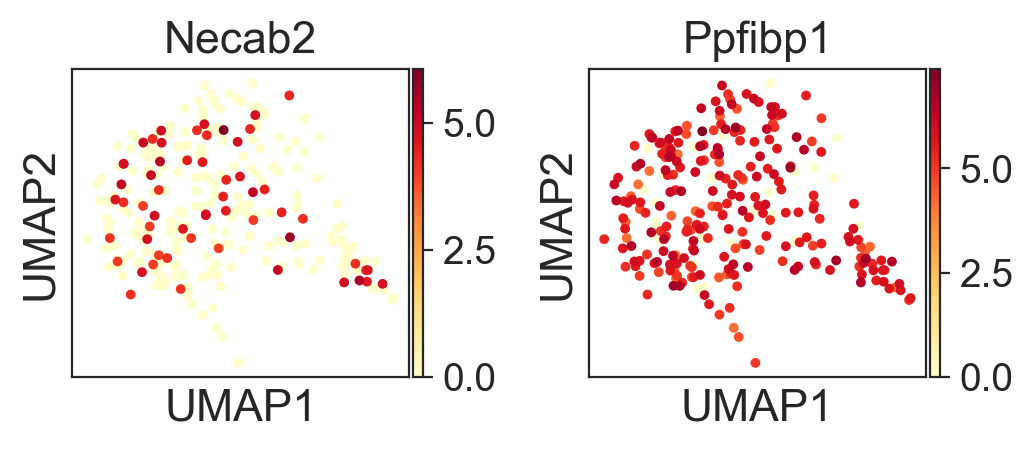

In [33]:
rcParams['figure.figsize'] = 2, 2
sc.pl.umap(neuall[neuall.obs['clusters'].isin(['Fusiform'])], color=['Necab2','Ppfibp1'], s = 50,
           legend_loc='on data',legend_fontsize= 10,cmap = 'YlOrRd', ncols=2, frameon= True,
)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


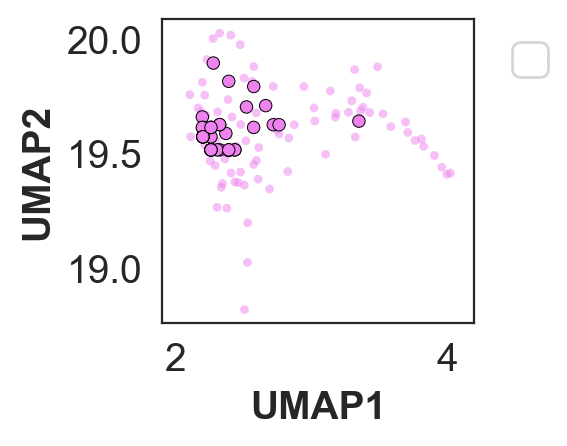

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
octo = neuUMAP[neuUMAP['clusters'] == 'Octopus'].copy()
sns.scatterplot(octo['umapX'],octo['umapY'],s = 10,
                    hue = octo['clusters'],legend =False,
                    palette = palette, 
                    edgecolor="none",
                    alpha = 0.5)

df = df1[df1['10x_clusters_subclusters'] == 'Octopus']

x = df['10x_mapping_umapX']
y = df['10x_mapping_umapY']

sns.scatterplot(df['10x_mapping_umapX'],df['10x_mapping_umapY'],s = 20,
                hue = df['T-cluster'],legend =False,
                palette = palette,
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.xlim([1.9,4.2])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


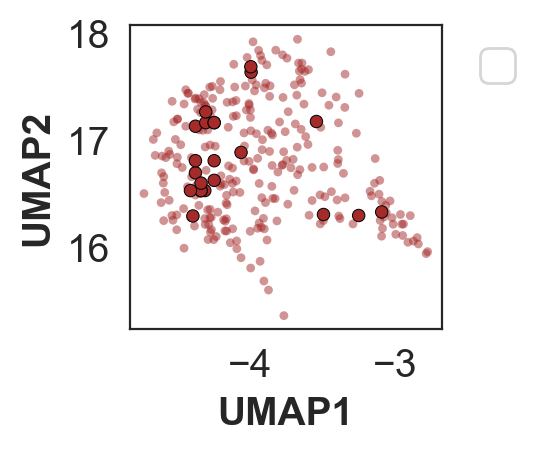

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
fusi = neuUMAP[neuUMAP['clusters'] == 'Fusiform'].copy()
sns.scatterplot(fusi['umapX'],fusi['umapY'],s = 10,
                    hue = fusi['clusters'],legend =False,
                    palette = palette, 
                    edgecolor="none",
                    alpha = 0.5)

df = df1[df1['10x_clusters_subclusters'] == 'Fusiform']
x = df['10x_mapping_umapX']
y = df['10x_mapping_umapY']

sns.scatterplot(df['10x_mapping_umapX'],df['10x_mapping_umapY'],s = 20,
                hue = df['T-cluster'],legend =False,
                palette = palette,
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(False)